In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Exploração dos dados


In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados


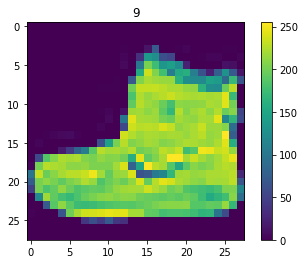

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''  
plt.imshow(imagens_treino[0])
plt.colorbar()


In [5]:
#normalização
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5322 - accuracy: 0.8102 - val_loss: 0.4064 - val_accuracy: 0.8584
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3992 - accuracy: 0.8551 - val_loss: 0.3810 - val_accuracy: 0.8600
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3643 - accuracy: 0.8651 - val_loss: 0.3459 - val_accuracy: 0.8741
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3416 - accuracy: 0.8733 - val_loss: 0.3537 - val_accuracy: 0.8687
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3238 - accuracy: 0.8812 - val_loss: 0.3329 - val_accuracy: 0.8790
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3089 - accuracy: 0.8852 - val_loss: 0.3229 - val_accuracy: 0.8831
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2973 - accuracy: 0.8881 - val_loss: 0.3291 - val_accuracy:

In [6]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

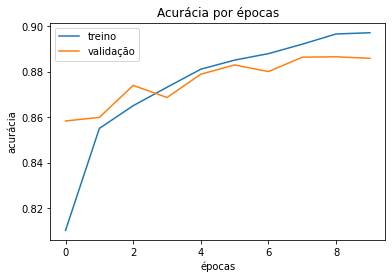

In [7]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

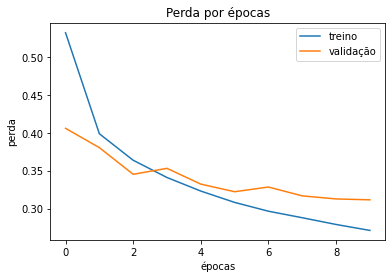

In [8]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [9]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 58.7532 - accuracy: 0.8621
Perda do teste: 58.75321960449219
Acurácia do teste: 0.8621000051498413
